**TP 2 Densité de probabilité, score, estimation du score à l'aide de réseaux de  neurones**


**Exercice 1:** (Loi de probabilités associée à une fonction de densité)
Ecrire une fonction `sample(densite)` qui prend en paramètre une fonction à deux variables `densite`et échantillone un élément suivant cette densité.  

**Indications :** Approximer la fonction de densité par des rectangles, découper les rectangles en blocs de même taille, les numéroter de 1 à N (nombre de blocs), utiliser la loi uniforme sur [1,N].

In [ ]:
## coder ici
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import math

def densite_gaussienne(mu,sigma):
    def densite(x):
        val=np.exp(-(x-mu)**2/(2*sigma**2))/((2*np.pi)**(1/2)*sigma)
        return(val)
    return(densite)

In [27]:
densite=densite_gaussienne(0.5,2)
print(densite(1))
mu=0.5
sigma=2
x=1

0.19333405840142465


In [28]:
### We create the base of the histogram :
min=-10
max=15
intervalle =[min,max]
#number of colons in the histogram
n=10000
grid=np.linspace(min,max,n)
#choose block height
h_block=0.001
#get the number of blocks needed in every colon
n_blocks=0
n_blocks_column=0
dictionnaire=[]
for point in grid:
    n_blocks_column=densite(point)//h_block
    n_blocks +=n_blocks_column
    #every list entry corresponds to the number of blocks needed in every colon.
    dictionnaire.append(n_blocks)

blocnumber=47
#parcourir finds number of blocks needed in the list for a given colon.

def normale(nombre_d_echantillons):
    liste=np.random.randint(0,n_blocks,nombre_d_echantillons)
    liste_valeurs=[grid[Indice(boite)] for boite in liste]
    return(liste_valeurs)

def Indice(num_boite):
    index = next(i for i, value in enumerate(dictionnaire) if value > num_boite)
    return(index)


def parcourir(blocnumber, dictionnaire):
    index = next(i for i, value in enumerate(dictionnaire) if value > blocnumber)
    return index

In [29]:
#Indice(47)
#index = next(i for i, value in enumerate(dictionnaire) if value > blocnumber)
#print(index)
print(normale(10))    

[2.5562556255625566, -1.1766176617661763, 0.35853585358535867, -3.1593159315931594, 0.8985898589858987, -1.639163916391638, -0.7265726572657254, 1.8461846184618462, -0.706570657065706, 0.8410841084108416]


In [30]:
grid[parcourir(np.random.randint(0,dictionnaire[-1]),dictionnaire)]

0.37853785378537985

In [31]:
np.exp(-(x-mu)**2/(2*sigma**2))/((2*np.pi)**(1/2)*sigma)

0.19333405840142465

**Exercice 2:** (visualisation)
Verifier en echantillonnant suffisemment de points que l'histogramme converge vers la densité (faire une représentation graphique dans $R^3$).

In [ ]:
#x = np.random.normal(170, 10, 250)
x=np.array(normale(5000))
print(x)

[ 1.10111011  1.82368237  0.84108411 ...  1.38113811 -0.4340434
  2.98129813]


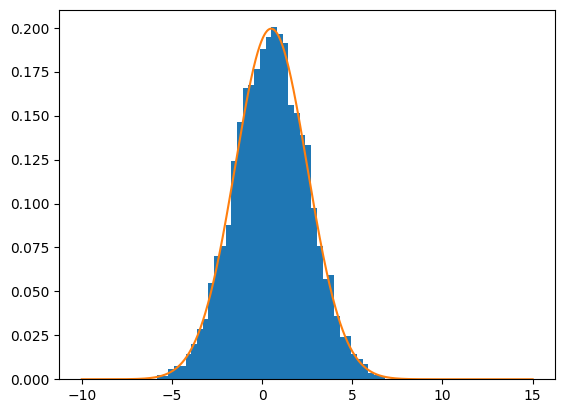

In [472]:
plt.hist(x,bins='auto', density='true')
y=np.array([densite(sommet) for sommet in grid])
plt.plot(grid, y)
plt.show() 

La suite du TP se base sur les notions de densité de probabilité expliquées **[ici.](https://github.com/SHI-Yu-Zhe/generative-modeling-explained)**

**Exercice 3:** (fonction de densité d'une mixture de gaussiennes)

Ecrire une fonction `densite_mixture(param)` qui prend comme paramètres les paramètres définissant une mixture de gaussienne à deux bosses dans $R^2$ et retourne la fonction de densité associée. Utiliser les fonctions différentiables de pytorch.

In [ ]:
## source https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

# covariance matrix
sigma1 = matrix([[2.3, 0],
           [0, 1.5]
          ])

sigma2 = matrix([[1, 0],
           [0, 3]
          ])
# mean vector
mu1 = array([2,3])

mu2 = array([0,0])

# input
x = array([2.1,3.5])

def densite_mixture(x, mu1, mu2, sigma1, sigma2):
    size = len(x)
    if size == len(mu1) and size == len(mu2) and (size, size) == sigma1.shape and (size, size) == sigma2.shape:
        det1 = linalg.det(sigma1)
        det2 = linalg.det(sigma2)
        if det1 == 0 or det2 == 0:
            raise NameError("The covariance matrices can't be singular")

        #norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu1 = matrix(x - mu1)
        inv1 = sigma1.I    
        x_mu2 = matrix(x - mu2)
        inv2 = sigma2.I  
        result = math.pow(math.e, -0.5 * (x_mu1 * inv1 * x_mu1.T)) +math.pow(math.e, -0.5 * (x_mu2 * inv2 * x_mu2.T))
        return  result
    else:
        raise NameError("The dimensions of the input don't match")

print(densite_mixture(x, mu1, mu2, sigma1, sigma2))

0.9323583512084854


In [ ]:
import matplotlib
### visualise the niveau lines
nb_points=25
ma=5
absc= np.linspace(0, ma, nb_points)
ordo = np.linspace(0, ma, nb_points)
X,Y = np.meshgrid(absc, ordo)
def densite(mu1, mu2, sigma1, sigma2):
    def fonction(x):
        return(densite_mixture(x, mu1, mu2, sigma1, sigma2))
    return(fonction)
               
dens=densite(mu1,mu2, sigma1, sigma2) 
points = np.column_stack([X.ravel(), Y.ravel()])
Z = [dens(point) for point in points]
Z = np.reshape(Z, (nb_points,nb_points))

**Exercice 4:** (score)
Ecrire une fonction `score(fonction)` qui prend une fonction `fonction` $: R^2 \rightarrow R$ et retourne le champs de gradient associé, i.e. une fonction `grad_fonction(x)` qui prend un point $x \in R^2$ et retourne le point $\nabla funtion(x)$. 

In [ ]:
eps=0.0001
def score(fonction):
    def grad_fonction(x):
        return ([(fonction([x[0]+eps,x[1]])-fonction(x))/eps,(fonction([x[0],x[1]+eps])-fonction(x))/eps])
    return(grad_fonction)

In [16]:
grad=score(dens)
print(grad([2,3]))

[-0.06041197647022045, -0.030229710177298585]


**Exercice 5:** (visualisation)
Faire une representation graphique dans $R^3$ du graphe de la densité de la mixture de gaussienne et de son champ de gradient. De manière alternative, visualiser dans $R^2$ les lignes de niveau de la densité et le champs de gradient de manière analogue à 
![image info](./score_contour.jpg)

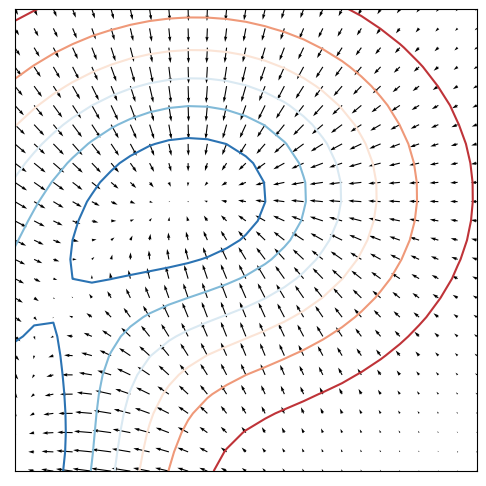

In [ ]:
#compute the gradient points
U = [grad(point)[0] for point in points]
V = [grad(point)[1] for point in points]

#create plot
fig, ax = plt.subplots(figsize=(6,6))
plt.quiver(X,Y, U, V)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 5, 0, 5])

#show plot
plt.show()

**Exercice 6:** (modélisation de la densité et du score)
Construire un réseau de neurones `pot` (MLP) $R^2 \rightarrow R$ et `grad` (MLP) $R^2 \rightarrow R^2$ qui vont servir à apprendre  respectivement la densité (potentiel) et le score (son gradient). 

In [ ]:
import torch
from torch import nn        #neuronal network
from torch import optim     #gradient descent
from sklearn.model_selection import train_test_split        #split into train and test set
from torch.utils.data import DataLoader
import itertools  

First NN model for density

In [2]:
input_dim = 2       #input layer with 2 neurons
hidden_dim = 10     #hidden layer with 10 neurons
output_dim = 1      #output layer with 1 neuron

In [ ]:
#NN class
class pot(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(pot, self).__init__()
        self.dropout = nn.Dropout(0.2)
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        self.dropout = nn.Dropout(0.2)
        x = torch.nn.functional.relu(self.layer_1(x))
        self.dropout = nn.Dropout(0.2)
        x = torch.nn.functional.sigmoid(self.layer_2(x))
    
        return x

In [4]:
#instantiate a model of NN class for density estimation
model = pot(input_dim, hidden_dim, output_dim)

#alpha = step-size in direction of gradient
learning_rate = 0.1
#loss function giving error between real and estimated data
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
#create dataset: sample randomly points (X,Y) from meshgrid and get their value Z (=Label)

taille = 5000
#sample point (x,y) uniformly from grid
xy_min =[0,0]
xy_max=[5,5]
X_dens = np.random.uniform(low=xy_min, high=xy_max, size=(taille,2))

#get the corresponding density z and store it as dataset y
y_dens = np.array([dens(point) for point in X_dens])
#print(X,y)

In [18]:
#split dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X_dens, y_dens, test_size=.33, random_state=26)

In [19]:
#enables to create different batches instead of treating whole dataset taking too much CPU

# Convert data to torch tensors
class Data():
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len

In [20]:
#set batch size for first model
batch_size = 100

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([100, 2])
y shape: torch.Size([100])


In [21]:
#train the model
num_epochs = 1000
loss_values = []

for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()
print("Training Complete")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training Complete


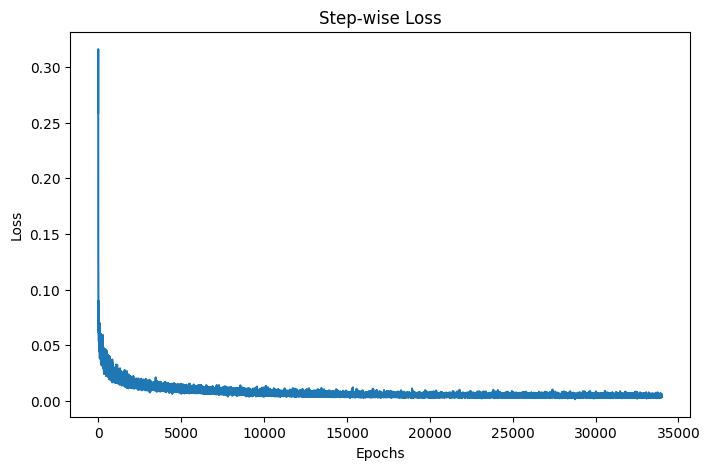

In [22]:
step = range(len(loss_values))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# 2. model pour grads

input_dim_grad = 2       #input layer with 2 neurons
hidden_dim_grad = 10     #hidden layer with 10 neurons
output_dim_grad = 2      #output layer with 1 neuron

class grad(nn.Module):
    def __init__(self, input_dim_grad, hidden_dim_grad, output_dim_grad):
        super(grad, self).__init__()
        self.dropout = nn.Dropout(0.2)
        self.layer_1 = nn.Linear(input_dim_grad, hidden_dim_grad)
        self.layer_2 = nn.Linear(hidden_dim_grad, output_dim_grad)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = self.dropout(x) #apply dropout correctly
        #do not use the sigmoid activation function for the second layer since gradients can be positive or negative.
        x = self.layer_2(x)

        return x
       
#instantiate a model of NN class
modelGrad = grad(input_dim_grad, hidden_dim_grad, output_dim_grad)
print(modelGrad)


In [493]:
#alpha = step-size in direction of gradient
learning_rate = 0.01
#loss function giving error between real and estimated data
loss_fn = nn.MSELoss()

optimizer_grad = torch.optim.SGD(modelGrad.parameters(), lr=learning_rate)

In [494]:
#create dataset: sample randomly points (X,Y) from meshgrid and get their value Z (=Label)

taille = 5000
#sample point (x,y) uniformly from grid
xy_min =[0,0]
xy_max=[5,5]
X_grad = np.random.uniform(low=xy_min, high=xy_max, size=(taille,2))

#get the corresponding gradient and store it as dataset y
y_grad = np.array([grad(point) for point in X_grad])


In [496]:
#split the dataset into train and test
X_train_grad, X_test_grad, y_train_grad, y_test_grad = train_test_split(X_grad, y_grad, test_size=.33, random_state=42)

In [497]:
# Convert data to torch tensors
batch_size = 100

# Instantiate training and test data
train_data_grad = Data(X_train_grad, y_train_grad)
train_dataloader_grad = DataLoader(dataset=train_data_grad, batch_size=batch_size, shuffle=True)

test_data_grad = Data(X_test_grad, y_test_grad)
test_dataloader_grad = DataLoader(dataset=test_data_grad, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X_grad, y_grad) in enumerate(train_dataloader_grad):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X_grad.shape}")
    print(f"y shape: {y_grad.shape}")
    break

Batch: 1
X shape: torch.Size([100, 2])
y shape: torch.Size([100, 2])


In [498]:
#Train the model
num_epochs = 1000
loss_values_grad = []

for epoch in range(num_epochs):
    for X, y in train_dataloader_grad:
        # zero the parameter gradients
        optimizer_grad.zero_grad()
       
        # forward + backward + optimize
        pred = modelGrad(X)
        loss = loss_fn(pred, y)
        loss_values_grad.append(loss.item())
        loss.backward()
        optimizer_grad.step()

print("Training Complete")

Training Complete


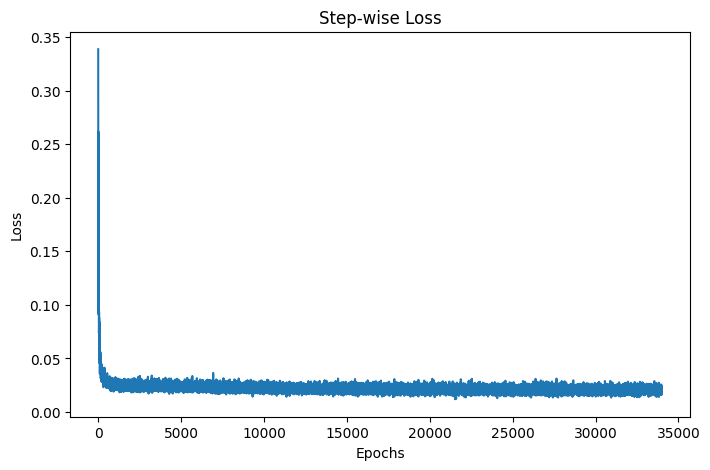

In [499]:
step = range(len(loss_values_grad))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values_grad))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

**Exercice 7:** (visualisation)
Produire un graphe similaire à celui ci 
![image info](./pitfalls.jpg)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


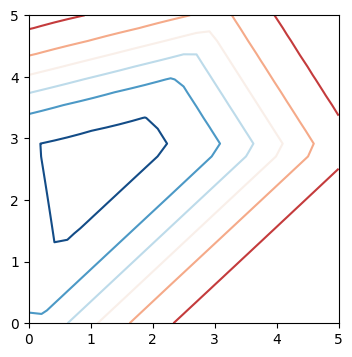

In [32]:
#visualisation of pot NN model
nb_points=25
ma=5
absc= np.linspace(0, ma, nb_points)
ordo = np.linspace(0, ma, nb_points)
X,Y = np.meshgrid(absc, ordo)
               
points = torch.from_numpy(np.column_stack([X.ravel(), Y.ravel()]).astype(np.float32))

with torch.no_grad():
    Z = torch.stack([model(point) for point in points]).numpy()  # Get model outputs

# Reshape Z to match the grid shape
Z = Z.reshape(nb_points, nb_points)

fig, ax = plt.subplots(figsize=(4,4))

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 5, 0, 5])

#show plot
plt.show()

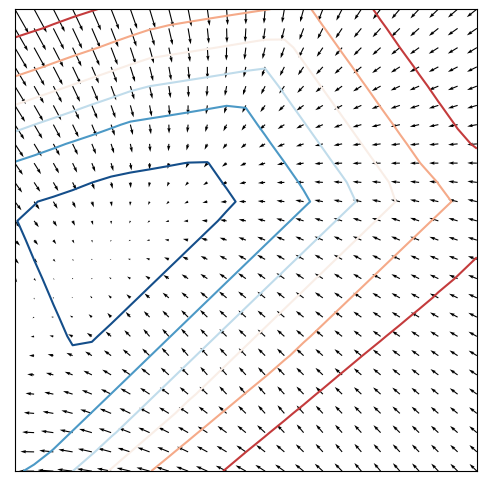

In [ ]:
#visualisation of grad NN model
#compute the gradient points with the NN model
modelGrad.eval()

nb_points=25
ma=5
absc= np.linspace(0, ma, nb_points)
ordo = np.linspace(0, ma, nb_points)
K,L = np.meshgrid(absc, ordo)

#print(np.column_stack([K.ravel(), L.ravel()]))

gridpoints = torch.from_numpy(np.column_stack([K.ravel(), L.ravel()]).astype(np.float32))
grads = modelGrad(gridpoints)

# Reshape Z to match the grid shape
grads = grads.reshape(nb_points, nb_points,2)

grads=grads.cpu().detach().numpy()
U = grads[:,:,0]
V = grads[:,:,1]
#create plot
fig, ax = plt.subplots(figsize=(6,6))
plt.quiver(K,L, U, V)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 5, 0, 5])

#show plot
plt.show()